(800, 1280, 3)


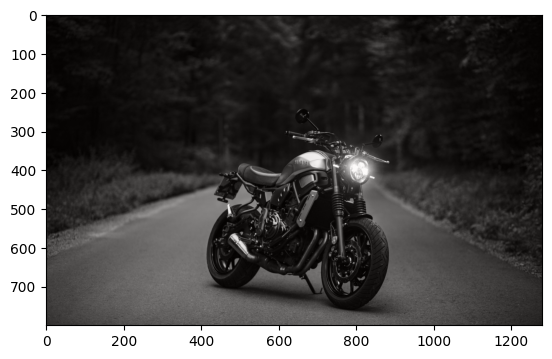

In [24]:
import cv2
from matplotlib import pyplot as plt

original_image = cv2.imread("test.jpg")

scale_factor = 0.5
img = cv2.resize(original_image, None, fx= scale_factor, fy= scale_factor, interpolation= cv2.INTER_LINEAR) 

print(img.shape)

plt.imshow(img)
plt.show()

FloatSlider(value=40.0, continuous_update=False, description='Процент зашумления изображения:', step=1.0)

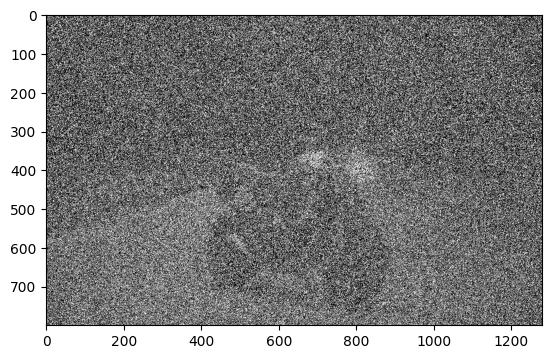

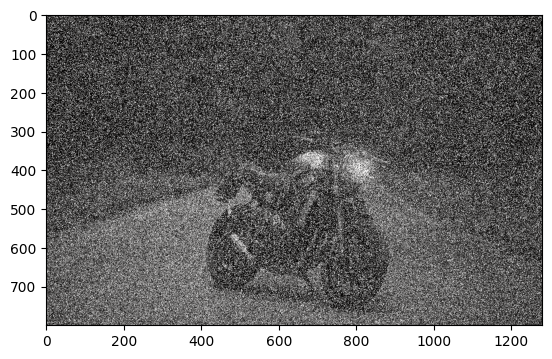

In [30]:
from IPython.display import display
from ipywidgets import FloatSlider
import random

fSlider = FloatSlider(
    value=40, # Первоначальное значение
    min=0,     # Минимум
    max=100.0,  # Максимум
    step=1,  # Шаг изменения
    description='Процент зашумления изображения:',
    continuous_update=False,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

def on_value_change(b):
    global img
    percentage = b['new']
    img = cv2.resize(original_image, None, fx= scale_factor, fy= scale_factor, interpolation= cv2.INTER_LINEAR) 
    for i, x in enumerate(img):
        for j, y in enumerate(x):
            if random.randint(0, 99) < percentage:
                # Change this pixel
                if random.randint(1,2) == 1:
                    img[i][j] = (255, 255, 255)
                else:
                    img[i][j] = (0, 0, 0)
    
    plt.imshow(img)
    plt.show()

fSlider.observe(on_value_change, names='value')
display(fSlider)

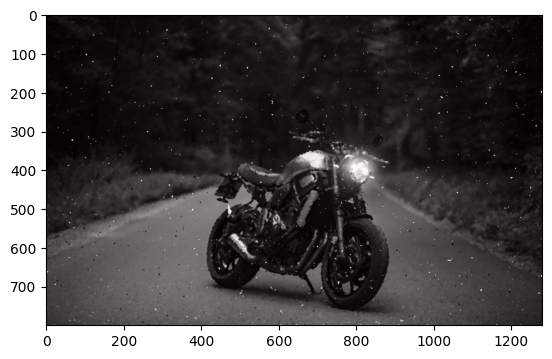

In [35]:
median = cv2.medianBlur(src=img, ksize=5)
plt.imshow(median)
plt.show()

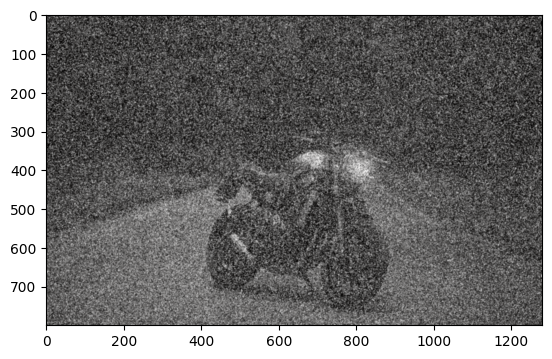

In [36]:
gaussian_blur = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0, sigmaY=0)
plt.imshow(gaussian_blur)
plt.show()

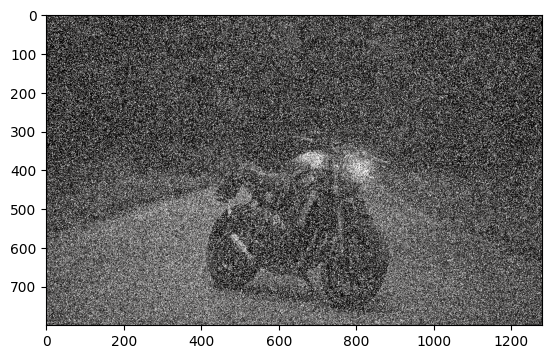

In [38]:
bilateral_filter = cv2.bilateralFilter(src=img, d=5, sigmaColor=75, sigmaSpace=75)
plt.imshow(bilateral_filter)
plt.show()

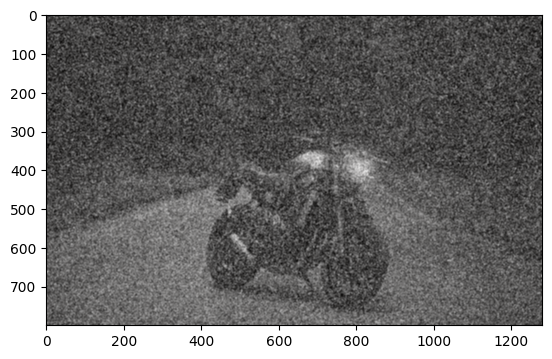

In [39]:
img_blur = cv2.blur(src=img, ksize=(5,5))
plt.imshow(img_blur)
plt.show()

In [ ]:
### Okay, median filter wins :)